<a href="https://colab.research.google.com/github/Vania2110/covid-19/blob/master/Evolu%C3%A7%C3%A3o_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Curso Data Science na Prática 2.0**
**by Vânia Dias**

# Panorama do COVID-19 no Brasil

Covid-19, segundo o site do [ministério da saúde](https://coronavirus.saude.gov.br/sobre-a-doenca#o-que-e-covid), é uma doença causada pelo coronavírus, denominado SARS-CoV-2, que apresenta um espectro clínico variando de infecções assintomáticas a quadros graves. De acordo com a Organização Mundial de Saúde, a maioria (cerca de 80%) dos pacientes com COVID-19 podem ser assintomáticos ou oligossintomáticos (poucos sintomas), e aproximadamente 20% dos casos detectados requer atendimento hospitalar por apresentarem dificuldade respiratória, dos quais aproximadamente 5% podem necessitar de suporte ventilatório.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/Vania2110/covid-19/master/coronav%C3%ADrus.jpg"></center>

É transmitido de uma pessoa doente para outra ou por contato próximo por meio de
toque do aperto de mão contaminadas, gotículas de saliva, espirro, tosse;catarro, objetos ou superfícies contaminadas, como celulares, mesas, talheres, maçanetas, brinquedos, teclados de computador etc.

Os dados COVID-19 completo é uma coleção dos dados COVID-19 mantidos por Our World in Data. Ele é atualizado diariamente e inclui dados sobre casos confirmados, óbitos e testes, bem como outras variáveis ​​de potencial interesse.
Veremos nesse dataset como está os casos dessa doença no Brasil, como atinge a vida dos brasileiros. Dados atualizados sobre casos confirmados, mortes e testes até o presente momento.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = 'https://raw.githubusercontent.com/Vania2110/covid-19/master/owid-covid-data.csv'
df = pd.read_csv(DATA_PATH)
df.date = pd.to_datetime(df.date)



Será feito uma análise Exploratória de Dados aonde será verificado os testes, casos confirmados, número de mortes, crianças... 
Dados no mundo e como está o Brasil em relação à outros países. Ocorre uma dificuldade para análise de dados, como é uma doença nova não se tem ainda vacinas e medidas preventivas.
Os dados foram retirados do site:  https://github.com/owid/covid-19-data/tree/master/public/data.

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [ ]:
df.shape

(39693, 40)

O presente DataFrame contém 39 colunas e 39.693 linhas.

In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

**Dicionário das variáveis das colunas**

Segue as variáveis e seus significados para possíveis consultas:


* `iso_code` -	ISO 3166-1 alfa-3 - códigos de três letras do país	
* `continente` -	Continente da localização geográfica	
* `localização` -	Localização geográfica	
* `encontro` -	Data de observação	
* `total_cases` -	Total de casos confirmados de COVID-19	
* `new_cases` -	Novos casos confirmados de COVID-19	
* `new_cases_smoothed` -	Novos casos confirmados de COVID-19 (corrigido por 7 dias)	
* `total_deaths` -	Total de mortes atribuídas a COVID-19
* `new_deaths` -	Novas mortes atribuídas a COVID-19	
* `new_deaths_smoothed` -	Novas mortes atribuídas a COVID-19 (suavizado 7 dias)
* `total_cases_per_million` -	Total de casos confirmados de COVID-19 por 1.000.000 de pessoas	
* `new_cases_per_million` -	Novos casos confirmados de COVID-19 por 1.000.000 de pessoas	
* `new_cases_smoothed_per_million` -	Novos casos confirmados de COVID-19 (suavizado por 7 dias) por 1.000.000 de pessoas	
* `total_deaths_per_million` -	Total de mortes atribuídas a COVID-19 por 1.000.000 de pessoas	
* `new_deaths_per_million` -	Novas mortes atribuídas a COVID-19 por 1.000.000 de pessoas	
* `new_deaths_smoothed_per_million` -	Novas mortes atribuídas a COVID-19 (suavizado por 7 dias) por 1.000.000 de pessoas	
* `total_tests` -	Total de testes para COVID-19	Relatórios do governo nacional
novos_testes	Novos testes para COVID-19	
* `new_tests_smoothed` -	Novos testes para COVID-19 (suavizado por 7 dias). Para países que não relatam dados de teste diariamente, presumimos que os testes mudaram igualmente diariamente em qualquer período em que nenhum dado foi relatado. Isso produz uma série completa de números diários, que é então calculada em média ao longo de uma janela contínua de 7 dias	
* `total_tests_per_thousand` -	Total de testes para COVID-19 por 1.000 pessoas	
* `new_tests_per_thousand` -	Novos testes para COVID-19 por 1.000 pessoas	
* `new_tests_smoothed_per_thousand` -	Novos testes para COVID-19 (suavizado 7 dias) por 1.000 pessoas	
* `tests_per_case` -	Testes conduzidos por novo caso confirmado de COVID-19, dado como uma média contínua de 7 dias (este é o inverso de Positive_rate)	
* `taxa positiva` -	A parcela de testes COVID-19 que são positivos, dada como uma média contínua de 7 dias (este é o inverso de tests_per_case)	
* `test_units` -	Unidades usadas pelo local para relatar seus dados de teste	
* `stringency_index` -	Índice de Restrição de Resposta do Governo: medida composta com base em 9 indicadores de resposta, incluindo fechamentos de escolas, fechamentos de locais de trabalho e proibições de viagens, redimensionado para um valor de 0 a 100 (100 = resposta mais estrita)	
* `população` -	População em 2020	
* `densidade populacional` -	Número de pessoas dividido por área terrestre, medido em quilômetros quadrados, ano mais recente disponível	
* `idade Média` -	Idade média da população, projeção da ONU para 2020	
* `idoso_65` -	Parcela da população com 65 anos ou mais, ano mais recente disponível	
* `idade_70` -	Parcela da população com 70 anos ou mais em 2015
* `gdp_per_capita` -	Produto interno bruto em paridade de poder de compra (dólares internacionais constantes de 2011), ano mais recente disponível	
* `pobreza extrema` -	Parcela da população que vive em pobreza extrema, ano mais recente disponível desde 2010
* `cardiovasc_death_rate` -	Taxa de mortalidade por doenças cardiovasculares em 2017 (número anual de mortes por 100.000 pessoas)	Rede Colaborativa da Carga Global de Doenças, Resultados do Estudo da Carga Global de Doenças de 2017
* `diabetes_prevalence` -	Prevalência de diabetes (% da população de 20 a 79 anos) em 2017	
* `fumantes femininas` -	Parcela de mulheres que fumam, ano mais recente disponível	
* `male_smokers` -	Parcela de homens que fumam, ano mais recente disponível
* `handwashing_facilities`-	Parcela da população com instalações básicas de lavagem das mãos no local, ano mais recente disponível	
* `hospital_beds_per_thousand` -	Leitos hospitalares por 1.000 pessoas, ano mais recente disponível desde 2010
* `expectativa de vida` -	Expectativa de vida ao nascer em 2019



In [ ]:
df.dtypes

iso_code                                   object
continent                                  object
location                                   object
date                               datetime64[ns]
total_cases                               float64
new_cases                                 float64
new_cases_smoothed                        float64
total_deaths                              float64
new_deaths                                float64
new_deaths_smoothed                       float64
total_cases_per_million                   float64
new_cases_per_million                     float64
new_cases_smoothed_per_million            float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
new_deaths_smoothed_per_million           float64
new_tests                                 float64
total_tests                               float64
total_tests_per_thousand                  float64
new_tests_per_thousand                    float64


**Segue a quantidade valores ausentes:**

In [ ]:
( df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

new_tests_per_thousand             0.679969
new_tests                          0.679969
total_tests                        0.671731
total_tests_per_thousand           0.671731
tests_per_case                     0.667851
positive_rate                      0.658882
new_tests_smoothed                 0.640239
new_tests_smoothed_per_thousand    0.640239
tests_units                        0.621218
handwashing_facilities             0.585695
extreme_poverty                    0.410753
male_smokers                       0.304210
female_smokers                     0.295468
hospital_beds_per_thousand         0.190059
stringency_index                   0.175144
aged_65_older                      0.119744
gdp_per_capita                     0.117678
aged_70_older                      0.111254
median_age                         0.106643
cardiovasc_death_rate              0.106316
diabetes_prevalence                0.075253
population_density                 0.050261
new_deaths_smoothed_per_million 

Conforme dados acima, estão faltando o preenchimento de muitos dados ainda. Como a doença é nova, recentemente foi feito novos testes.

In [ ]:
df.date.max()

Timestamp('2020-08-26 00:00:00')

A data máxima desses dados colhidos foi dia 26-08-2020.
Está sendo feito a análise até esse dia.

A seguir será verificado na data do dia 26-08-2020 qual o *total de casos e o total de mortes no mundo* devido ao COVID-19:

In [ ]:
df.loc[df.date == '2020-08-26'].sort_values(by="total_cases", ascending=False)
df.loc[df.date == '2020-08-26'].sort_values(by="total_deaths", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
39452,OWID_WRL,NaN,World,2020-08-26,23928539.0,247181.0,252711.429,819756.0,6322.0,5516.714,3069.808,31.711,32.421,105.167,0.811,0.708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58
37572,USA,North America,United States,2020-08-26,5779028.0,38119.0,42373.143,178486.0,1207.0,952.143,17459.159,115.162,128.015,539.228,3.646,2.877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86
5353,BRA,South America,Brazil,2020-08-26,3669995.0,47134.0,37520.143,116580.0,1271.0,956.000,17265.738,221.745,176.516,548.458,5.980,4.498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
23572,MEX,North America,Mexico,2020-08-26,568621.0,4916.0,5340.286,61450.0,650.0,525.143,4410.214,38.128,41.419,476.605,5.041,4.073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.900,21.400,87.847,1.380,75.05
16801,IND,Asia,India,2020-08-26,3234474.0,67151.0,66743.000,59449.0,1059.0,937.143,2343.814,48.660,48.364,43.079,0.767,0.679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.900,20.600,59.550,0.530,69.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30100,KNA,North America,Saint Kitts and Nevis,2020-08-26,17.0,0.0,0.000,0.0,0.0,0.000,319.597,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.319200e+04,212.865,NaN,NaN,NaN,24654.385,NaN,NaN,12.84,NaN,NaN,NaN,2.300,76.23
12290,FLK,South America,Falkland Islands,2020-08-26,13.0,0.0,0.000,0.0,0.0,0.000,3732.415,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.483000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.44
30265,LCA,North America,Saint Lucia,2020-08-26,26.0,0.0,0.000,0.0,0.0,0.000,141.590,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.836290e+05,293.187,34.9,9.721,6.405,12951.839,NaN,204.620,11.62,NaN,NaN,87.202,1.300,76.20
14275,GIB,Europe,Gibraltar,2020-08-26,256.0,8.0,4.857,0.0,0.0,0.000,7598.468,237.452,144.167,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.369100e+04,3457.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.93


Até a data analisada (26-08-2020), Total de casos registrados do COVID-19:

1.   Estados Unidos : 5.779.028
2.   Brasil : 3.669.995
3.   México : 568.621

Segue um gráfico de barras para os 5 países com mais mortes no mundo:

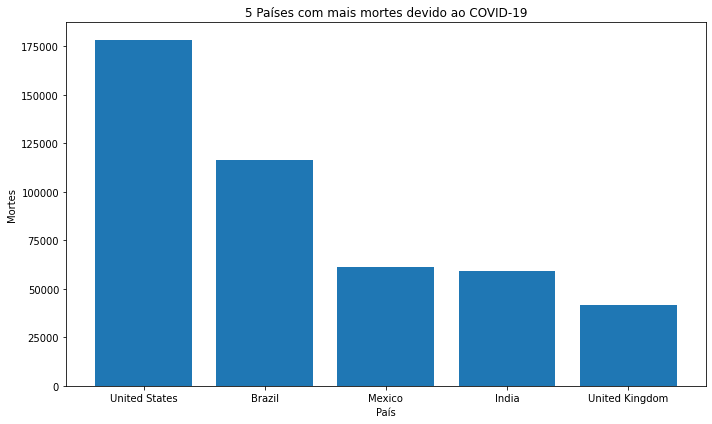

In [ ]:
df.loc[df.date == '2020-08-26', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]
top_5_total_deaths = df.loc[df.date == '2020-08-26', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]

fig, ax = plt.subplots(figsize=(10,6))

ax.bar('location', 'total_deaths', data=top_5_total_deaths)

ax.set_title('5 Países com mais mortes devido ao COVID-19')
ax.set_xlabel('País')
ax.set_ylabel('Mortes')

plt.tight_layout()


Até a data analisada (26-08-2020), números de mortes:

1.   Estados Unidos : 178.486
2.   Brasil : 116.580
3.   México : 61.450



Segue um gráfico de linhas para verificar a evolução do total de casos de COVID-19 no mundo, uma das principais preocupações das organizações de saúde no mundo.

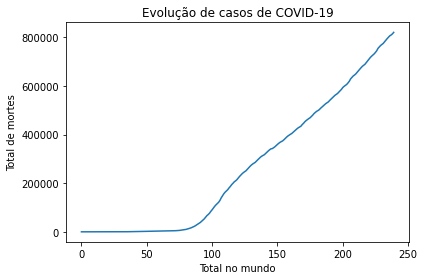

In [ ]:
fig, ax = plt.subplots()

df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot()
ax.set_title('Evolução de casos de COVID-19')
ax. set_ylabel('Total de mortes')
ax. set_xlabel('Total no mundo')

plt.tight_layout()


Análise Exploratória para o Brasil

DataFrame para o Brasil:

In [ ]:
df_brasil = df.loc[df.location == 'Brazil'].copy()

df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
5114,BRA,South America,Brazil,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
5115,BRA,South America,Brazil,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
5116,BRA,South America,Brazil,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
5117,BRA,South America,Brazil,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
5118,BRA,South America,Brazil,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [ ]:
df_brasil.date.max()

Timestamp('2020-08-26 00:00:00')

Datas de 31-12-2019 até 26-08-2020

In [ ]:
df_brasil.loc[df_brasil['new_deaths'] != 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
5192,BRA,South America,Brazil,2020-03-18,291.0,57.0,36.714,1.0,1.0,0.143,1.369,0.268,0.173,0.005,0.005,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


A primeira morte foi registrada no Brasil dia 18-03-2020.

In [ ]:
df_brasil.loc[df_brasil['new_cases'] != 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
5171,BRA,South America,Brazil,2020-02-26,1.0,1.0,0.143,0.0,0.0,0.0,0.005,0.005,0.001,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


O primeiro caso registrado foi dia 26-02-2020.

In [ ]:
from datetime import date
delta = df_brasil.date.loc[5192] - df_brasil.date.loc[5171]
format(delta.days)

'21'

Passaram-se 21 dias para registrarmos a primeira morte.
Considerando o primeiro caso de COVID-19 registrado dia 26-02-2020 e a primeira morte dia 18-03-2020.

Gráfico de linha em escalas linear e logarítimica para os casos totais e mortes totais registrados no Brasil.
Evolução da doença:

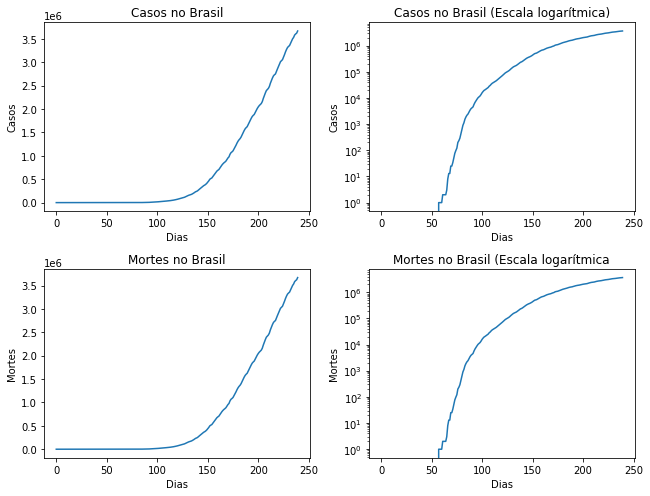

In [ ]:
x = list(range(240))
z = df_brasil['total_cases']
z2 = df_brasil['total_deaths']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(9, 7))
ax1.set_title('Casos no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x, z)

ax2.set_title('Casos no Brasil (Escala logarítmica)')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(x, z)

ax3.set_title('Mortes no Brasil')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')
ax3.plot(x, z)

ax4.set_title('Mortes no Brasil (Escala logarítmica')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Mortes')
ax4.set_yscale('log')
ax4.plot(x, z)
plt.tight_layout()

# ***Conclusão***:
Esses dados são registrados diariamente, e como os casos ainda estão em crescimento (todos os dias) serão desatualiados.

Contudo, conforme as datas analisadas seguem algumas observações:

*   Os Estados Unidos estão com muitos mais casos da doença COVID-19 e mais mortes em relação aos outros países.
*   O Brasil fica em segundo com muitos casos e evolução da doença.
*   No total, os casos estão aumentado no decorrer do período analisado.
*   O perído de tempo foi pouco para tamanha evolução de pessoas contaminadas e até mortes.   

Medidas corretivas estão sendo analisadas e sendo executadas para diminuir os casos, mas ainda bem longe de diminuir. A vacina em estudo, está sendo aguardada com muita apreensão para que esses números diminuem.

